#### Neccessary imports and downloads

In [ ]:
import numpy as np
import pandas as pd

In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
data = pd.read_csv('/content/drive/MyDrive/NLP_Dataset/223k crypto news headlines. Dataset. BDCenter Digital.csv')['headlinetext']
data

0                                               what is apx
1                                               what is not
2                                               what is ark
3                                               what is eos
4                                               what is nxt
                                ...                        
223079    qompass announces airdrop ahead of their ico p...
223080    confideal mvp 13 cooperations with other compa...
223081    pr secure identity ledger corporation goes dir...
223082    mymedis readies for ico launch creates a new p...
223083    really fair collateral procedures of usdq and ...
Name: headlinetext, Length: 223084, dtype: object

# Topic modelling to determine the text's sematic

In [22]:
data.describe()

count                                             223084
unique                                            208382
top       no there was no raid on tron by chinese police
freq                                                   2
Name: headlinetext, dtype: object

In [23]:
data[110000]

'binance incubator makes the most where other venture capitalists fade away crypto venture investment'

#### Preprocessing

In [24]:
from nltk.tokenize import word_tokenize

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language="english")

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import string
punct = string.punctuation

In [25]:
def process(s):
    for p in punct:
        s = s.replace(p, '')
    s = s.lower()
    s = word_tokenize(s)
    s = [w for w in s if not w in stop_words] #optional
    s = [stemmer.stem(word) for word in s]
    return s

In [26]:
from tqdm import tqdm

for i in tqdm(data.index):
    data[i] = process(data[i])
    data[i] = " ".join(data[i])

100%|██████████| 223084/223084 [01:06<00:00, 3358.34it/s]


Vectorizing the text for the model

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [28]:
vectorizer = CountVectorizer()
bow_data = vectorizer.fit_transform(data)
bow_data.shape

(223084, 44927)

In [29]:
vectorizer = TfidfVectorizer(max_features=3000)
tfidf_data = vectorizer.fit_transform(data).toarray()
tfidf_features = vectorizer.get_feature_names_out()
tfidf_data = pd.DataFrame(tfidf_data, columns=tfidf_features)
tfidf_data

,0x,10,100,1000,10000,100000,100k,100m,101,10k,...,zec,zero,zerofe,zhao,zil,zilliqa,zimbabw,zone,zrx,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Using LDA model 

In [30]:
from sklearn.decomposition import LatentDirichletAllocation

Setting the topic limit to 25

In [31]:
lda = LatentDirichletAllocation(n_components=25)

In [32]:
mat = lda.fit_transform(tfidf_data)
mat.shape

(223084, 25)

In [36]:
mat[5]

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.52, 0.02, 0.02,
       0.02, 0.02, 0.02])

In [37]:
lda.components_.shape

(25, 3000)

In [38]:
lda.components_[5]

array([ 0.04      , 15.24592327,  4.83953149, ...,  0.04      ,
        0.04      ,  0.04      ])

In [39]:
topics = np.argmax(mat, axis=1)
topics

array([ 0,  0, 11, ..., 17, 17,  6])

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

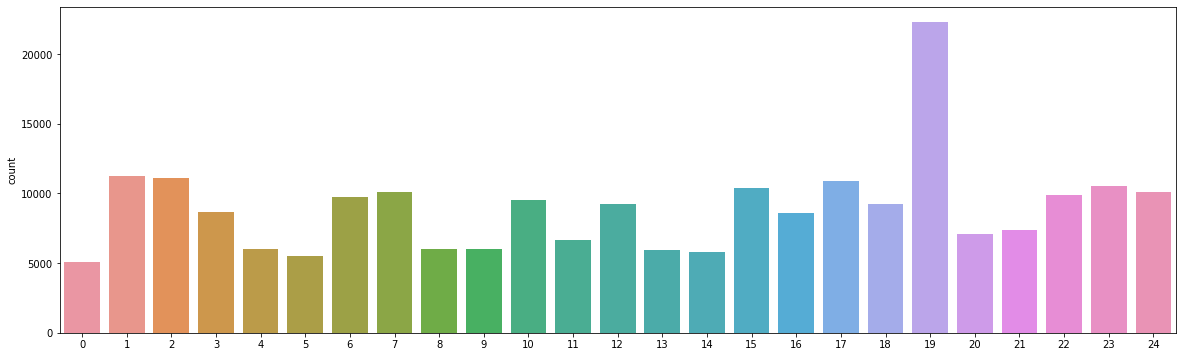

In [41]:
plt.figure(figsize=(20,6))
sns.countplot(x=topics)
plt.show()

In [42]:
topic_word = lda.components_
# topic_word.shape
topic_word

array([[4.00000000e-02, 2.36729864e+01, 1.83453670e+01, ...,
        4.00000000e-02, 4.00000000e-02, 4.00000000e-02],
       [4.00000000e-02, 8.63350240e+00, 5.42255950e+00, ...,
        4.00000000e-02, 4.00000000e-02, 6.80671158e+01],
       [4.00000000e-02, 1.01426977e+02, 9.84847354e+01, ...,
        2.35723582e+00, 4.00000000e-02, 4.00000000e-02],
       ...,
       [4.00000000e-02, 1.56429507e+01, 4.97558700e+00, ...,
        4.00000000e-02, 4.00000000e-02, 4.00000000e-02],
       [7.11212761e+01, 2.63077940e+01, 1.03954381e+01, ...,
        4.00000000e-02, 4.25545729e+01, 4.00000000e-02],
       [4.00000000e-02, 8.65072184e+00, 5.35093924e+00, ...,
        4.00000000e-02, 4.00000000e-02, 4.00000000e-02]])

Creating a Word Cloud for each topic and maintaing a list of those words

In [43]:
from wordcloud import WordCloud, STOPWORDS

In [44]:
topic_list=[]

def wordcloud(i):
    words_dist = topic_word[i,:]
    ranked_word_indices = words_dist.argsort()
    ranked_words = [tfidf_features[i] for i in ranked_word_indices][-1:-40:-1]
    ranked_words_in_one_text = " ".join(ranked_words)
    cloud = WordCloud(background_color='black',
              colormap="vlag", stopwords=STOPWORDS.add("australia")).generate(ranked_words_in_one_text)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.title(f"Most common words in topic {i}")
    plt.axis("off")
    plt.show()
    
    topic_list.append(ranked_words_in_one_text)

In [32]:
i=10
words_dist = topic_word[i,:]
# topic_word[i]
ranked_word_indices = words_dist.argsort()
ranked_words = [tfidf_features[i] for i in ranked_word_indices][-1:-40:-1]
ranked_words
ranked_words_in_one_text = " ".join(ranked_words)
ranked_words_in_one_text

'tron wallet trx cardano app venezuela sun partnership ada justin announc launch bitcoin dapp hardwar ledger bittorr new petro mobil avail differ crypto celebr support android cryptocurr ethereum io blockchain venezuelan releas jack messag news trezor token user charl'

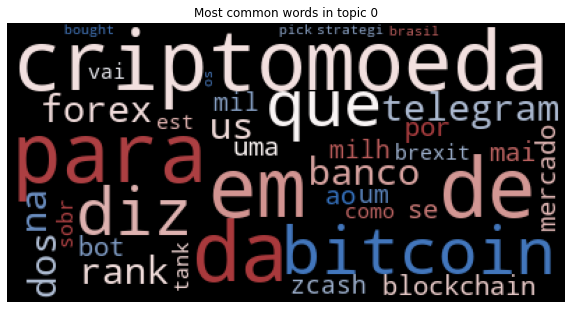

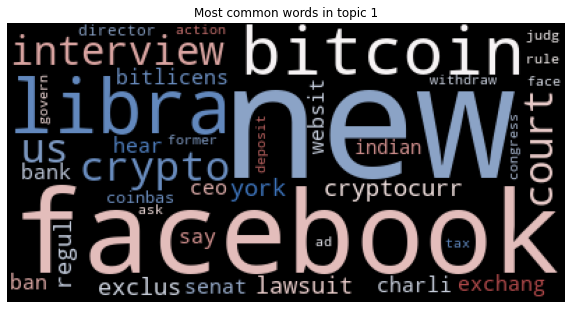

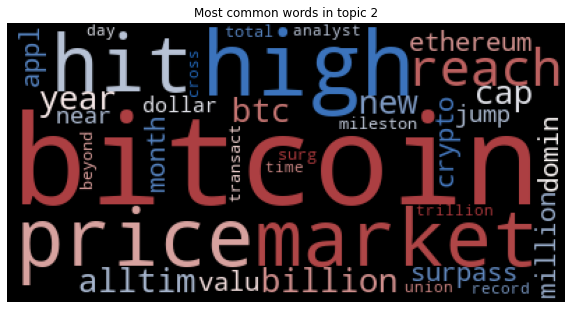

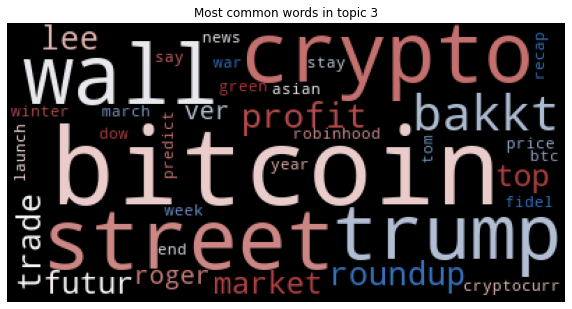

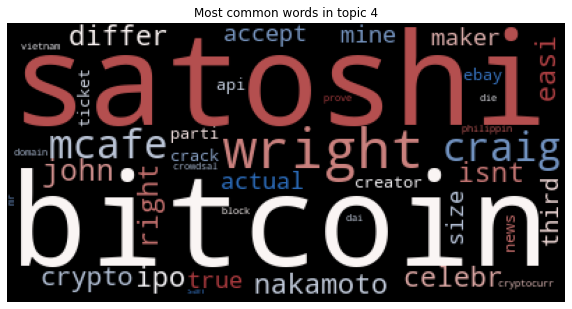

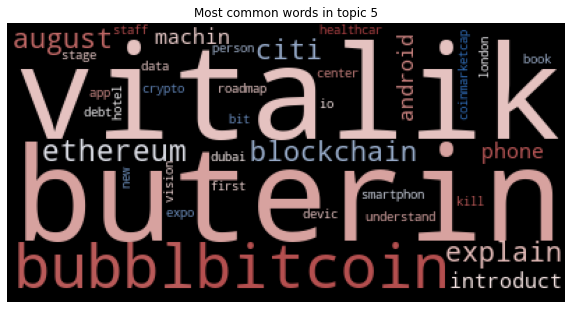

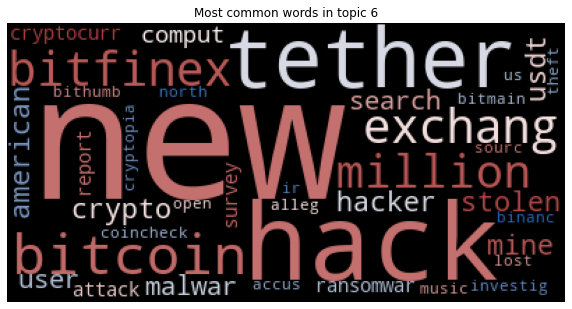

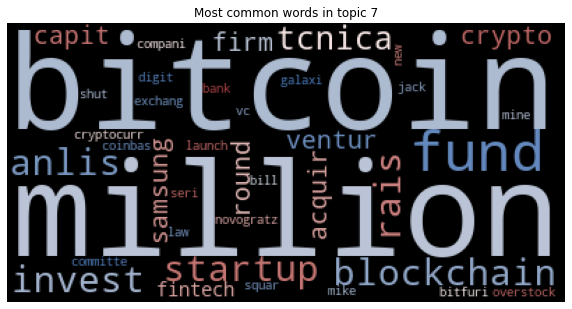

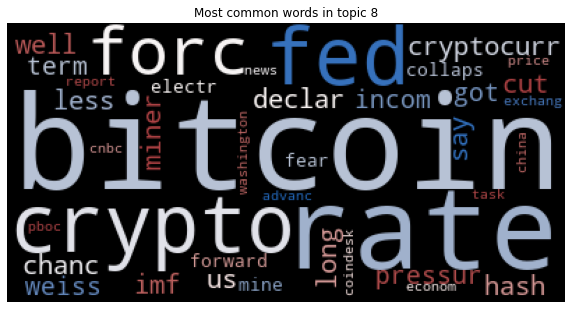

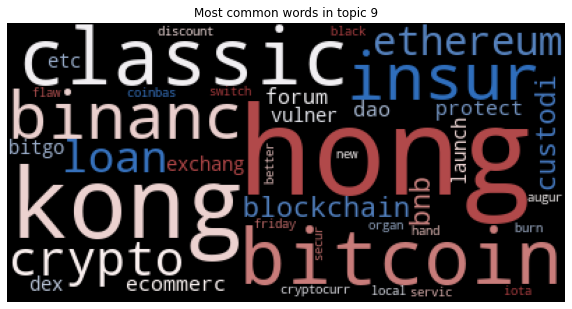

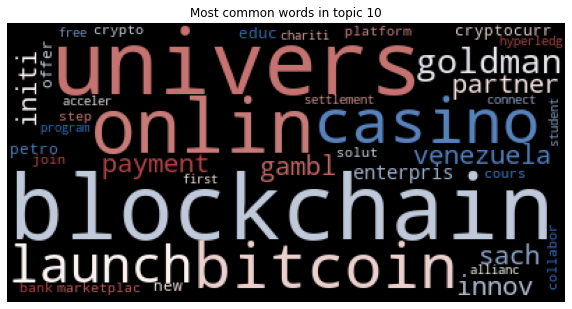

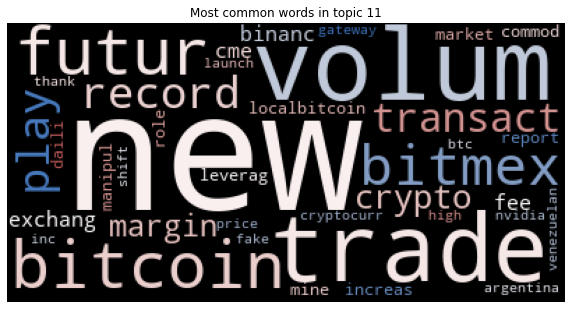

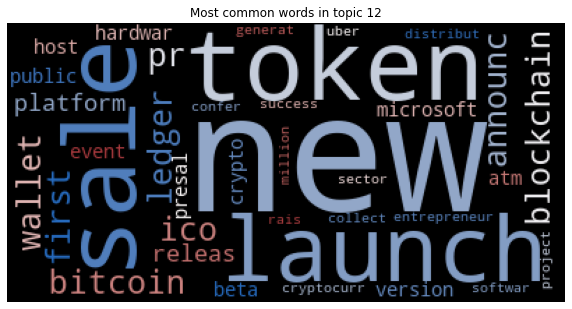

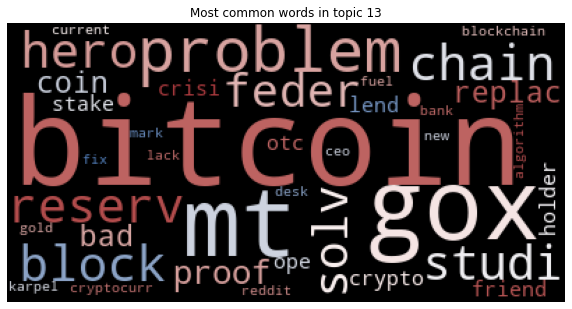

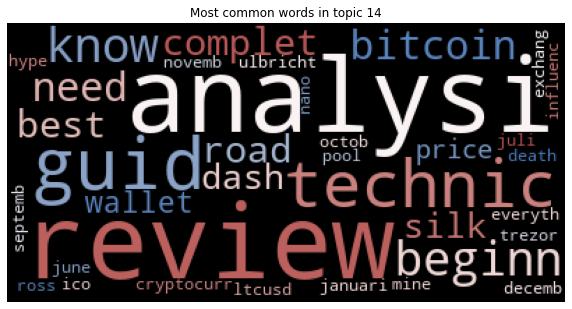

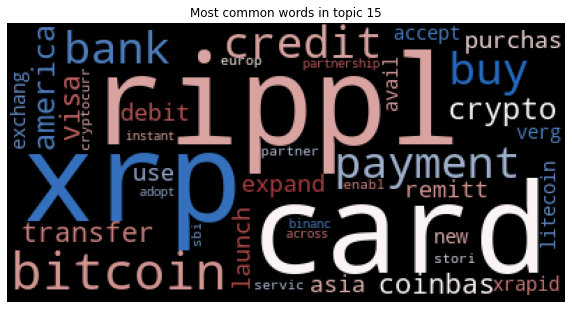

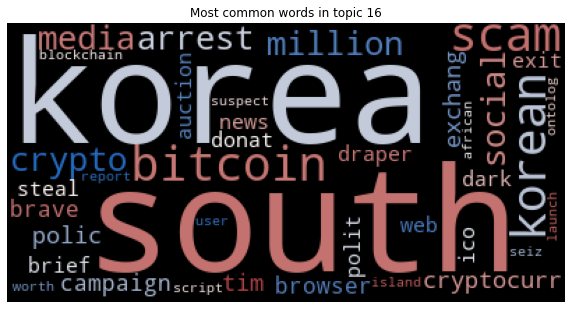

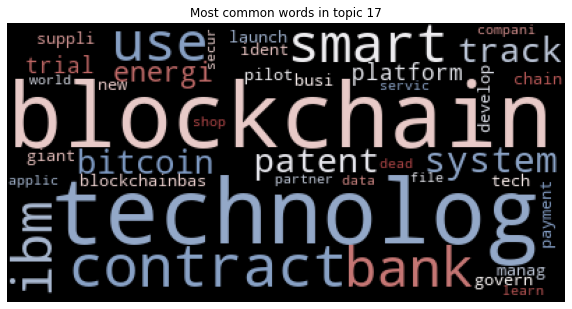

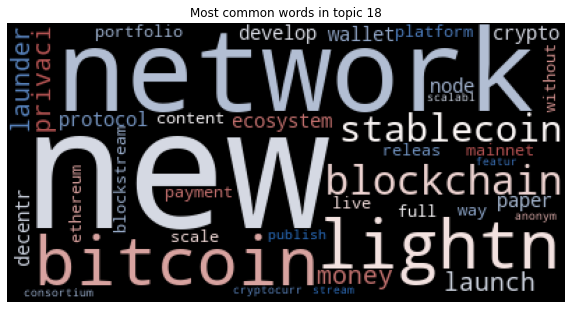

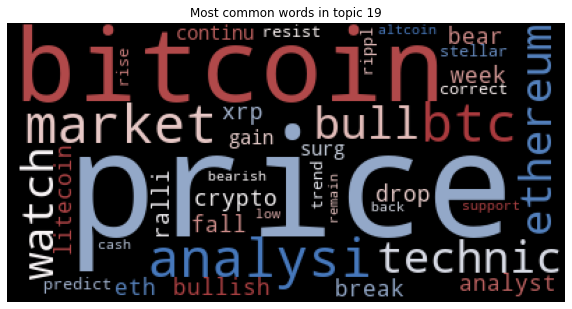

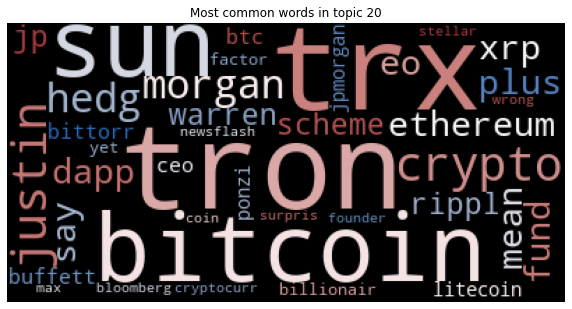

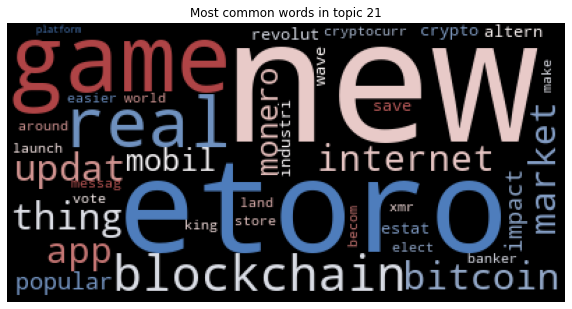

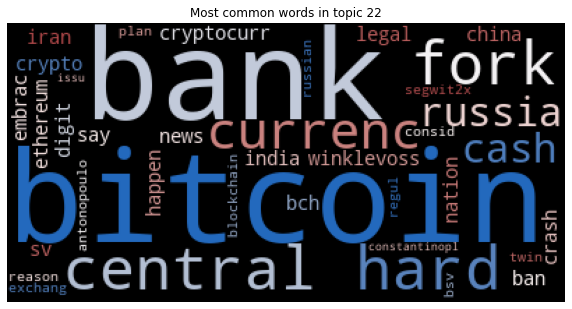

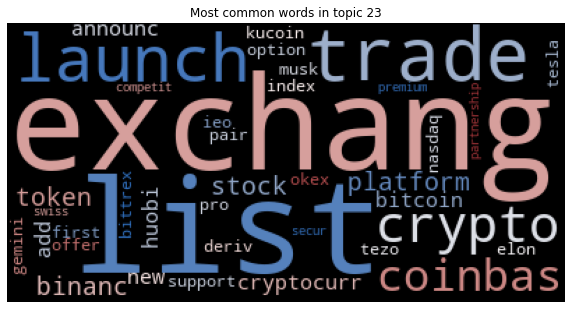

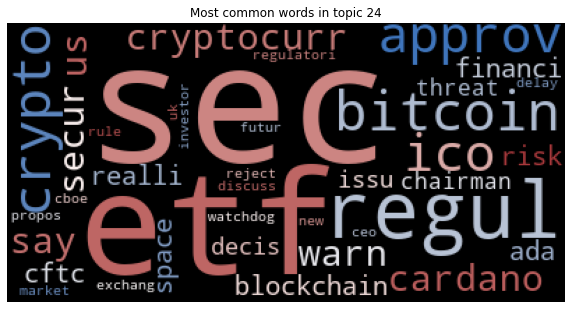

In [45]:
number_of_topics = topic_word.shape[0]
for i in range(number_of_topics):
    wordcloud(i)

In [46]:
(topic_list)

['de criptomoeda em da para bitcoin com diz que telegram na rank banco us forex dos blockchain por bot ao uma mai mercado se zcash milh mil um brexit como est sobr tank vai strategi pick bought brasil os',
 'facebook libra bitcoin crypto interview court us cryptocurr new york lawsuit regul exclus exchang bank bitlicens charli ban senat news hear websit say ceo indian coinbas director withdraw congress face former deposit rule govern judg ad action tax ask',
 'bitcoin high price market hit reach billion cap year alltim btc new surpass crypto 500 ethereum domin could month million appl valu jump near dollar mileston surg beyond transact total trillion time day 2019 analyst cross union record 10000',
 'bitcoin crypto 2018 wall street trump 2019 bakkt profit roundup lee trade futur top market roger ver cryptocurr dow week tom end war price fidel march asian say robinhood winter green predict launch btc year 2014 news stay recap',
 'bitcoin satoshi wright craig mcafe john nakamoto celebr di

### Calculating sentiment of the above text

In [56]:
senti_df=pd.DataFrame(topic_list, columns=['Topics'])
senti_df

,Topics
0,de criptomoeda em da para bitcoin com diz que ...
1,facebook libra bitcoin crypto interview court ...
2,bitcoin high price market hit reach billion ca...
3,bitcoin crypto 2018 wall street trump 2019 bak...
4,bitcoin satoshi wright craig mcafe john nakamo...
5,vitalik buterin bitcoin bubbl ethereum blockch...
6,hack tether bitcoin bitfinex exchang million c...
7,bitcoin million fund startup blockchain invest...
8,bitcoin rate crypto fed forc cryptocurr well c...
9,hong kong classic bitcoin binanc insur crypto ...


In [57]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [59]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [125]:
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')

def text_prep(x: str) -> list:
  corp = str(x).lower() 
  corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
  tokens = word_tokenize(corp)
  words = [t for t in tokens if t not in stop_words]
  lemmatize = [lemma.lemmatize(w) for w in words]

  return lemmatize

In [126]:
preprocess_tag = [text_prep(i) for i in senti_df['Topics']]

senti_df["preprocess_txt"] = preprocess_tag

senti_df['total_len'] = senti_df['preprocess_txt'].map(lambda x: len(x))

In [127]:
file = open('/content/drive/MyDrive/NLP_Dataset/negative-words.txt', 'r')
neg_words = file.read().split()

file = open('/content/drive/MyDrive/NLP_Dataset/positive-words.txt', 'r')
pos_words = file.read().split()

Calculating Sentiment for each topic

In [128]:
num_pos = senti_df['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
senti_df['pos_count'] = num_pos

num_neg = senti_df['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
senti_df['neg_count'] = num_neg

senti_df['sentiment'] = round((senti_df['pos_count'] - senti_df['neg_count']) / senti_df['total_len'], 2)

senti_df.head()

,Topics,preprocess_txt,total_len,pos_count,neg_count,sentiment
0,de criptomoeda em da para bitcoin com diz que ...,"[de, criptomoeda, em, da, para, bitcoin, com, ...",39,0,1,-0.03
1,facebook libra bitcoin crypto interview court ...,"[facebook, libra, bitcoin, crypto, interview, ...",39,0,0,0.00
2,bitcoin high price market hit reach billion ca...,"[bitcoin, high, price, market, hit, reach, bil...",36,1,0,0.03
3,bitcoin crypto 2018 wall street trump 2019 bak...,"[bitcoin, crypto, wall, street, trump, bakkt, ...",36,2,0,0.06
4,bitcoin satoshi wright craig mcafe john nakamo...,"[bitcoin, satoshi, wright, craig, mcafe, john,...",39,1,2,-0.03


Overall BTC's sentiment for this perticular text

In [65]:
bitcoin_overall_sentiment = senti_df['sentiment'].mean()
bitcoin_overall_sentiment

-0.006400000000000001

# Bitcoin Price Prediction


In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
df = pd.read_csv('/content/drive/MyDrive/NLP_Dataset/Bitcoin complete open close data.csv', parse_dates=['date'], index_col='date')
df.head()

,symbol,open,high,low,close,volume,market,name,ranknow
date,,,,,,,,,
2013-04-28,BTC,135.30,135.98,132.10,134.21,0,1500520000,Bitcoin,1
2013-04-29,BTC,134.44,147.49,134.00,144.54,0,1491160000,Bitcoin,1
2013-04-30,BTC,144.00,146.93,134.05,139.00,0,1597780000,Bitcoin,1
2013-05-01,BTC,139.00,139.89,107.72,116.99,0,1542820000,Bitcoin,1
2013-05-02,BTC,116.38,125.60,92.28,105.21,0,1292190000,Bitcoin,1


Preprocessing

In [134]:
btc=df[df['symbol']=='BTC']#Extracting the bitcoin data from the dataframe
btc.drop(['volume','symbol','name','ranknow','market'],axis=1,inplace=True)#Just dropping columns here!

btc

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,open,high,low,close
date,,,,
2013-04-28,135.30,135.98,132.10,134.21
2013-04-29,134.44,147.49,134.00,144.54
2013-04-30,144.00,146.93,134.05,139.00
2013-05-01,139.00,139.89,107.72,116.99
2013-05-02,116.38,125.60,92.28,105.21
...,...,...,...,...
2017-12-14,16384.60,17085.80,16185.90,16564.00
2017-12-15,16601.30,18154.10,16601.30,17706.90
2017-12-16,17760.30,19716.70,17515.30,19497.40


Label y

In [135]:
btc['Price_After_Month']=btc['close']
btc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,open,high,low,close,Price_After_Month
date,,,,,
2013-04-28,135.30,135.98,132.10,134.21,134.21
2013-04-29,134.44,147.49,134.00,144.54,144.54
2013-04-30,144.00,146.93,134.05,139.00,139.00
2013-05-01,139.00,139.89,107.72,116.99,116.99
2013-05-02,116.38,125.60,92.28,105.21,105.21
...,...,...,...,...,...
2017-12-14,16384.60,17085.80,16185.90,16564.00,16564.00
2017-12-15,16601.30,18154.10,16601.30,17706.90,17706.90
2017-12-16,17760.30,19716.70,17515.30,19497.40,19497.40


In [136]:
from sklearn import preprocessing

btc.dropna(inplace=True)

X = btc.drop(['close','Price_After_Month'],axis=1)

X=preprocessing.scale(X)  #Scaling the X values before passing into the model

y=btc['Price_After_Month']
X
# y

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


array([[-0.46316351, -0.45644052, -0.46778947],
       [-0.46359038, -0.45103666, -0.46680673],
       [-0.45884514, -0.45129958, -0.46678086],
       ...,
       [ 8.28525926,  8.73656417,  8.52339079],
       [ 9.13677241,  8.9113563 ,  9.27793159],
       [ 8.95341539,  8.57426055,  8.9581776 ]])

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

Using Random Forest Regressor

In [138]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor(n_estimators=10,random_state=101)
reg.fit(X_train,y_train)

accuracy=reg.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.3f}".format(accuracy))

print('Accuracy is:',accuracy,'%')

Accuracy is: 99.854 %


Predicting some values to compare with test values

In [139]:
preds = reg.predict(X_test)
print("Prediction: ",preds[1]," Actual: " ,y_test[1])

Prediction:  567.4280000000001  Actual:  574.16


In [140]:
forecast=preds
len(forecast)

509

Creating a dataframe to compare Actual and Predicted Values

In [141]:
predicted_df=pd.DataFrame(forecast, columns=['Forecast'])
predicted_df['Actual']=list(y_test)
predicted_df

,Forecast,Actual
0,7400.670,7407.41
1,567.428,574.16
2,249.703,244.53
3,640.240,624.68
4,456.821,444.69
...,...,...
504,378.955,382.56
505,504.215,519.71
506,610.621,612.13
507,412.393,413.31


Calulating the ratio between the two columns

In [142]:
df_ratio_1 = predicted_df['Forecast']/predicted_df['Actual']
df_ratio_2 = predicted_df['Actual']/predicted_df['Forecast']

In [143]:
print(df_ratio_1.mean())
df_ratio_1

0.9999102275291222


0      0.999090
1      0.988275
2      1.021155
3      1.024909
4      1.027280
         ...   
504    0.990577
505    0.970185
506    0.997535
507    0.997781
508    1.009869
Length: 509, dtype: float64

In [99]:
# print(df_ratio_2.mean())
# df_ratio_2

### Text news weight affecting the prediction is 0.1 by looking at the ratio forecast : Actual

Over all BTC sentiment was found to be 0.006400000000000001 above

In [144]:
predicted_df['Forecast'] = predicted_df['Forecast'].map(lambda x: x + (x * (0.1*0.006400000000000001)))

### We can see the forecasted values have imporved as compared with the model not taking the news into consideration

In [145]:
predicted_df

,Forecast,Actual
0,7405.406429,7407.41
1,567.791154,574.16
2,249.862810,244.53
3,640.649754,624.68
4,457.113365,444.69
...,...,...
504,379.197531,382.56
505,504.537698,519.71
506,611.011797,612.13
507,412.656932,413.31


In [146]:
accuracy_2 = reg.score(X_test, predicted_df['Forecast'])
accuracy_2 = accuracy*100
accuracy_2 = float("{0:.4f}".format(accuracy))

print('Accuracy is:',accuracy_2,'%')

Accuracy is: 99.854 %
